In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("listings.csv", delimiter=";")
data.head()

,Unnamed: 0,ID,Name,Summary,Space,Description,Experiences_Offered,Neighborhood_Overview,Notes,Transit,...,Last_Review,License,Jurisdiction_Names,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Geolocation,Features,Listing_Type,Rating
0,70285,199681.0,Private room in sunny three bedroom,This apartment in the West Rogers Park (or Wes...,Hi there traveler. Thanks for considering sta...,This apartment in the West Rogers Park (or Wes...,none,I love that my neighborhood is so quiet and lo...,NaN,Parking around here is very easy. You might wi...,...,2016-09-18,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,4.0,1.34,"41.9941700301, -87.6920295649","Host Has Profile Pic,Host Identity Verified,Re...",Good,67259.201267
1,44913,4216764.0,Lovely & cute apartment,Lovely apartment for a couple or a single pers...,Interior desig in accordance with the Scandina...,Lovely apartment for a couple or a single pers...,none,Quite and peaceful neighborhood in the Frederi...,"Please note that the bed is rather small (1,5 ...",Close to bus and the metro stations 'Frederiks...,...,2014-10-31,NaN,NaN,flexible,1.0,0.03,"55.6913945558, 12.5352884346",Host Has Profile Pic,Good,58503.191267
2,154025,14879686.0,Unique house with a beautiful garden,Beautiful design cosy family house with a nice...,"Beautiful garden, two level house (105 m2) nea...",Beautiful design cosy family house with a nice...,none,Nice multicultural neighbourhood with plenty o...,Since our house is designed to be child friend...,Tram and bus stops in a 5 minutes walk distanc...,...,2016-10-02,NaN,Amsterdam,strict,1.0,0.29,"52.3689656398, 4.84983993143","Host Has Profile Pic,Is Location Exact",Good,58480.587448
3,281148,9879014.0,Résidence du 14 Rue des Sablons;,"50 m2, un grand lit et un canapé lit deux plac...",NaN,"50 m2, un grand lit et un canapé lit deux plac...",none,NaN,NaN,NaN,...,NaN,NaN,Paris,flexible,1.0,NaN,"48.8663711212, 2.28291441119","Host Has Profile Pic,Is Location Exact",Bad,NaN
4,235251,14372222.0,Darling 2 story historical spanish,"2 blocks from beach, 1 block from 2nd st",NaN,"2 blocks from beach, 1 block from 2nd st Kitch...",none,NaN,NaN,Yes,...,NaN,NaN,NaN,flexible,1.0,NaN,"33.7595912067, -118.138810843",Host Has Profile Pic,Bad,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341147 entries, 0 to 341146
Data columns (total 73 columns):
Unnamed: 0                        341147 non-null object
ID                                281035 non-null object
Name                              340843 non-null object
Summary                           330066 non-null object
Space                             239355 non-null object
Description                       341040 non-null object
Experiences_Offered               341147 non-null object
Neighborhood_Overview             201313 non-null object
Notes                             135623 non-null object
Transit                           209960 non-null object
Access                            185199 non-null object
Interaction                       177176 non-null object
House_Rules                       205030 non-null object
Host_Name                         340783 non-null object
Host_Since                        340783 non-null object
Host_Location                     

## Feature Selection

#### Take a look at Variables

In [3]:
#Getting the data columns
print(len(data.columns))
print(data.columns)

73
Index(['Unnamed: 0', 'ID', 'Name', 'Summary', 'Space', 'Description',
       'Experiences_Offered', 'Neighborhood_Overview', 'Notes', 'Transit',
       'Access', 'Interaction', 'House_Rules', 'Host_Name', 'Host_Since',
       'Host_Location', 'Host_About', 'Host_Response_Time',
       'Host_Response_Rate', 'Host_Acceptance_Rate', 'Host_Neighbourhood',
       'Host_Listings_Count', 'Host_Total_Listings_Count', 'Street',
       'Neighbourhood', 'Neighbourhood_Cleansed',
       'Neighbourhood_Group_Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart_Location', 'Country_Code', 'Country', 'Latitude', 'Longitude',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Amenities', 'Square_Feet', 'Price', 'Weekly_Price',
       'Monthly_Price', 'Security_Deposit', 'Cleaning_Fee', 'Guests_Included',
       'Extra_People', 'Minimum_Nights', 'Maximum_Nights', 'Calendar_Updated',
       'Has_Availability', 'Availability_30', 'Availab

#### When we look at the variables, many of them are useless to us at this stage.Lets drop them.

In [4]:
useless= ['Unnamed: 0', 'ID', 'Name', 'Summary', 'Space', 'Description',
       'Experiences_Offered', 'Neighborhood_Overview', 'Notes', 'Transit',
       'Access', 'Interaction', 'House_Rules', 'Host_Name', 'Host_Since',
       'Host_Location', 'Host_About', 'Host_Neighbourhood',
       'Host_Listings_Count', 'Host_Total_Listings_Count', 'City',
       'State', 'Market', 'Smart_Location', 'Country_Code', 'Country',
        'First_Review', 'Last_Review','Jurisdiction_Names','Geolocation','Calendar_last_Scraped','Calendar_Updated']
newdata = data.copy()
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))
print(newdata.columns)

41
Index(['Host_Response_Time', 'Host_Response_Rate', 'Host_Acceptance_Rate',
       'Street', 'Neighbourhood', 'Neighbourhood_Cleansed',
       'Neighbourhood_Group_Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Amenities', 'Square_Feet', 'Price', 'Weekly_Price',
       'Monthly_Price', 'Security_Deposit', 'Cleaning_Fee', 'Guests_Included',
       'Extra_People', 'Minimum_Nights', 'Maximum_Nights', 'Has_Availability',
       'Availability_30', 'Availability_60', 'Availability_90',
       'Availability_365', 'Number_of_Reviews', 'License',
       'Cancellation_Policy', 'Calculated_host_listings_count',
       'Reviews_per_Month', 'Features', 'Listing_Type', 'Rating'],
      dtype='object')


### Now we are left with 41 features after dropping 32 useless features

## Check if the Dataset is Balanced or not

In [5]:
print(newdata["Listing_Type"].value_counts())

Good    309045
Bad      31144
Name: Listing_Type, dtype: int64


######  Here the dataset is highly imbalanced. 10 % Bad & 90 % Good
##### So we need to handle this imbalanced dataset.
#####  We will use Algorithmic Ensemble Techniques - bagging and Boosting Technique to handle the dataset

## Check for null values in output variable - Listing_Type
#### If any and ratio is less , lets drop those rows

In [6]:
print("null values % in Listing Type is {}".format(newdata["Listing_Type"].isnull().sum()/len(newdata)))

null values % in Listing Type is 0.0028081736025818782


Lets drop 0.2 % values

In [7]:
print(len(newdata))
newdata = newdata.dropna(subset=["Listing_Type"])
print(len(newdata))

341147
340189



## Check for Null Data Values
#### Plot histogram


In [8]:
percentage_missing_data = newdata.isnull().sum()/ len(newdata)

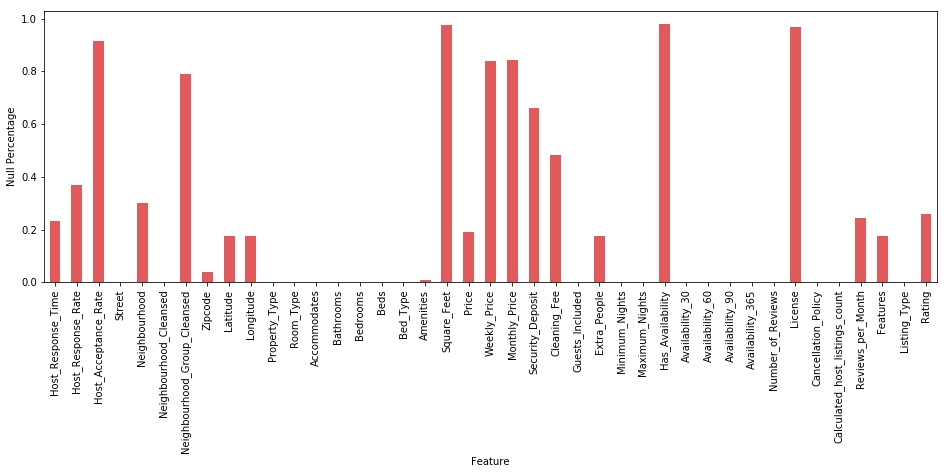

In [9]:
axis = percentage_missing_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Null Percentage")
plt.show()

Observation here:
Many have around 90% empty data, lets drop them
lets drop the dataset where null >30%

In [10]:
null_columns = percentage_missing_data[percentage_missing_data > 0.3].index
print(len(null_columns))
print(null_columns)
newdata= newdata.drop(null_columns,axis=1)
print(len(newdata.columns))
print(newdata.columns)

10
Index(['Host_Response_Rate', 'Host_Acceptance_Rate',
       'Neighbourhood_Group_Cleansed', 'Square_Feet', 'Weekly_Price',
       'Monthly_Price', 'Security_Deposit', 'Cleaning_Fee', 'Has_Availability',
       'License'],
      dtype='object')
31
Index(['Host_Response_Time', 'Street', 'Neighbourhood',
       'Neighbourhood_Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Amenities', 'Price', 'Guests_Included',
       'Extra_People', 'Minimum_Nights', 'Maximum_Nights', 'Availability_30',
       'Availability_60', 'Availability_90', 'Availability_365',
       'Number_of_Reviews', 'Cancellation_Policy',
       'Calculated_host_listings_count', 'Reviews_per_Month', 'Features',
       'Listing_Type', 'Rating'],
      dtype='object')


# Now we have 31 Features to work with after dropping 11 columns which had 30% or more null values

### Check for Sparsh Categorical Data

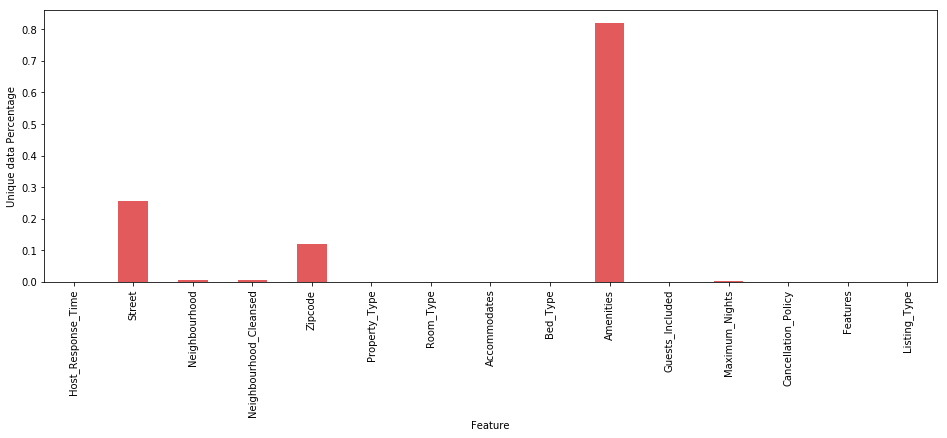

In [11]:
cat_col = newdata.columns[newdata.dtypes =="object"]
percentage_unique_data = newdata[cat_col].nunique()/ len(newdata)

axis = percentage_unique_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Unique data Percentage")
plt.show()

### Lets look at Data Distributon for Street, zipcode

In [12]:
print("unique values  % in street {}".format(newdata["Street"].nunique()/len(newdata)))

unique values  % in street 0.25497003136491775


In [13]:
print("unique values  % in zipcode {}".format(newdata["Zipcode"].nunique()/len(newdata)))

unique values  % in zipcode 0.11946006484630603


### We will drop these too because they are too dirty

In [14]:
useless= ['Street','Zipcode']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))
print(newdata.columns)

29
Index(['Host_Response_Time', 'Neighbourhood', 'Neighbourhood_Cleansed',
       'Latitude', 'Longitude', 'Property_Type', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed_Type', 'Amenities', 'Price',
       'Guests_Included', 'Extra_People', 'Minimum_Nights', 'Maximum_Nights',
       'Availability_30', 'Availability_60', 'Availability_90',
       'Availability_365', 'Number_of_Reviews', 'Cancellation_Policy',
       'Calculated_host_listings_count', 'Reviews_per_Month', 'Features',
       'Listing_Type', 'Rating'],
      dtype='object')


## Lets Look at Amenities

In [15]:
newdata["Amenities"].head()

0    TV,Internet,Wireless Internet,Air conditioning...
1    Internet,Kitchen,Pets live on this property,Do...
2    TV,Internet,Wireless Internet,Kitchen,Heating,...
3    TV,Cable TV,Internet,Wireless Internet,Air con...
4                                                  NaN
Name: Amenities, dtype: object

#### This Data can be splitted into different values ---> Tv, Washing Machine etc

In [16]:
print("% of na values in Amenities {}".format(newdata["Amenities"].isnull().sum()/ len(newdata)))
len(newdata)

% of na values in Amenities 0.007595777641252363


340189


### Thats a very less 1%, lets drop null values for Amenities

In [17]:
print(len(newdata))
newdata = newdata.dropna(subset=["Amenities"])
print(len(newdata))

340189
337605


In [18]:
## function to split data into different columns
amenities_count=[]
def splitValues_To_Columns(data):

    data = data.str.split(",")
    corpus= []
    for i in range(0,len(data)):
        temp = [x.replace(' ','') for x in data.iloc[i]]
        temp = [x.replace('-','') for x in temp]
        amenities_count.append(len(temp))
        temp = " ".join(temp)
        corpus.append(temp)
        
    return corpus


In [19]:
vectorizer = CountVectorizer()
amenities = vectorizer.fit_transform(splitValues_To_Columns(newdata["Amenities"]))
print("All amenities are:")
print(vectorizer.get_feature_names())
print("Matrix looks like")
print(amenities.shape)
print(amenities.toarray())


All amenities are:
['24hourcheckin', 'accessibleheightbed', 'accessibleheighttoilet', 'airconditioning', 'babybath', 'babymonitor', 'babysitterrecommendations', 'bathtub', 'bbqgrill', 'beachessentials', 'beachfront', 'bedlinens', 'breakfast', 'buzzer', 'cabletv', 'carbonmonoxidedetector', 'cat', 'changingtable', 'children', 'cleaningbeforecheckout', 'coffeemaker', 'cookingbasics', 'crib', 'disabledparkingspot', 'dishesandsilverware', 'dishwasher', 'dog', 'doorman', 'doormanentry', 'dryer', 'elevatorinbuilding', 'en', 'essentials', 'ethernetconnection', 'evcharger', 'extrapillowsandblankets', 'family', 'fireextinguisher', 'fireplaceguards', 'firmmatress', 'firmmattress', 'firstaidkit', 'flatsmoothpathwaytofrontdoor', 'freeparkingonpremises', 'freeparkingonstreet', 'gameconsole', 'gardenorbackyard', 'grabrailsforshowerandtoilet', 'gym', 'hairdryer', 'hangers', 'heating', 'highchair', 'hostgreetsyou', 'hosting_amenity_49', 'hosting_amenity_50', 'hottub', 'hotwater', 'indoorfireplace', 'in

## Let's create column having Amenities Count


In [20]:
newdata["Amenities_Count"] = pd.Series(amenities_count)
newdata.head()

,Host_Response_Time,Neighbourhood,Neighbourhood_Cleansed,Latitude,Longitude,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,...,Availability_90,Availability_365,Number_of_Reviews,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Features,Listing_Type,Rating,Amenities_Count
0,within an hour,Avondale,West Ridge,41.994170,-87.692030,Apartment,Private room,2.0,1.0,1.0,...,83.0,126.0,93.0,moderate,4.0,1.34,"Host Has Profile Pic,Host Identity Verified,Re...",Good,67259.201267,15.0
1,NaN,NaN,Frederiksberg,55.691395,12.535288,Apartment,Entire home/apt,2.0,1.0,1.0,...,0.0,165.0,1.0,flexible,1.0,0.03,Host Has Profile Pic,Good,58503.191267,11.0
2,within a day,NaN,De Baarsjes - Oud-West,52.368966,4.849840,Apartment,Entire home/apt,4.0,1.0,2.0,...,7.0,7.0,2.0,strict,1.0,0.29,"Host Has Profile Pic,Is Location Exact",Good,58480.587448,14.0
3,NaN,Passy,Passy,48.866371,2.282914,Apartment,Entire home/apt,4.0,1.0,1.0,...,0.0,0.0,0.0,flexible,1.0,NaN,"Host Has Profile Pic,Is Location Exact",Bad,NaN,24.0
5,NaN,La Latina,Embajadores,40.407510,-3.707988,House,Entire home/apt,2.0,1.0,1.0,...,0.0,0.0,1.0,flexible,1.0,0.02,"Host Has Profile Pic,Is Location Exact,Require...",Bad,NaN,17.0


## Lets look at "Features" column

In [21]:
print("% of na values in Features {}".format(newdata["Features"].isnull().sum()/ len(newdata)))

% of na values in Features 0.17851631344322508


## 17 % data is too much to drop for null values in features. 
So we prefer to drop the column.

In [22]:
useless= ['Features']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))

29


### Create df for Amenties word array and merge to to dataset in the final steps

In [23]:
amenities_df = pd.DataFrame(data = amenities.toarray())
amenities_df.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Lets look at remaining 29 columns

In [24]:
print(newdata.columns)

Index(['Host_Response_Time', 'Neighbourhood', 'Neighbourhood_Cleansed',
       'Latitude', 'Longitude', 'Property_Type', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed_Type', 'Amenities', 'Price',
       'Guests_Included', 'Extra_People', 'Minimum_Nights', 'Maximum_Nights',
       'Availability_30', 'Availability_60', 'Availability_90',
       'Availability_365', 'Number_of_Reviews', 'Cancellation_Policy',
       'Calculated_host_listings_count', 'Reviews_per_Month', 'Listing_Type',
       'Rating', 'Amenities_Count'],
      dtype='object')


### Lets look at Neighbourhood_Cleansed

In [25]:
counts_per_neighbourhood = newdata["Neighbourhood_Cleansed"].value_counts()

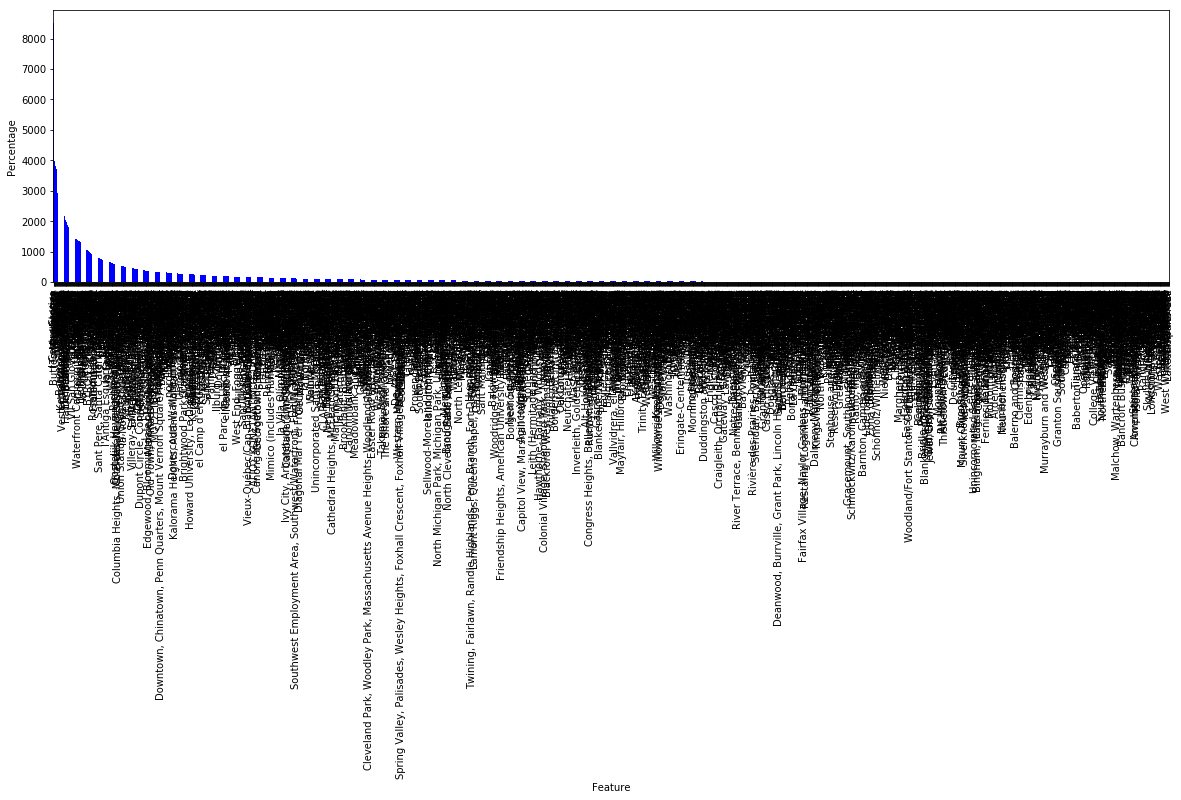

In [27]:
axis = counts_per_neighbourhood.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Percentage")
plt.show()

In [28]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337605 entries, 0 to 341146
Data columns (total 29 columns):
Host_Response_Time                259759 non-null object
Neighbourhood                     237332 non-null object
Neighbourhood_Cleansed            337605 non-null object
Latitude                          277500 non-null float64
Longitude                         277500 non-null float64
Property_Type                     337600 non-null object
Room_Type                         337605 non-null object
Accommodates                      337566 non-null object
Bathrooms                         336819 non-null float64
Bedrooms                          337174 non-null float64
Beds                              337139 non-null float64
Bed_Type                          337605 non-null object
Amenities                         337605 non-null object
Price                             272808 non-null float64
Guests_Included                   337605 non-null object
Extra_People                

 ## Lets replace all theNeighbourhood_Cleansed as "Other" if count is < 1000 or null

In [ ]:
print("null data in Neighbourhood_Cleansed is {} ".format(newdata["Neighbourhood_Cleansed"].isnull().sum()))
newdata["Neighbourhood_Cleansed"] = newdata["Neighbourhood_Cleansed"].replace(np.nan, "Other")
print("After replacing null data with 0, Neighbourhood_Cleansed null count is {} ".format(newdata["Neighbourhood_Cleansed"].isnull().sum()))

In [ ]:
neighbourhood_unique_data =newdata["Neighbourhood_Cleansed"].value_counts()

In [ ]:
#neighbourhood_unique_data =newdata["Neighbourhood_Cleansed"].value_counts()
newdata["Neighbourhood_Cleansed"] = newdata["Neighbourhood_Cleansed"].apply(lambda x : "Other" if (neighbourhood_unique_data[x]<1000) else x)

In [ ]:
counts_per_neighbourhood = newdata["Neighbourhood_Cleansed"].value_counts()
axis = counts_per_neighbourhood.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Percentage")
plt.show()

### It is very dirty and we have latitude & longitude for our localtoin, so we can remove this too 

In [ ]:
useless= ['Neighbourhood_Cleansed']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))

## After all this cleaning , lets see for null values for 28 columns

In [ ]:
percentage_missing_data = newdata.isnull().sum()/ len(newdata)

In [ ]:
axis = percentage_missing_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Null Percentage")
axis.set_ylim(0,1)
plt.show()

##### All the Numerical columns which have major null values can be replaced by theie mean value.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print(len(newdata.columns))
for i in range(0, len(newdata.columns)):
    if (newdata.iloc[:,i].dtype  in numerics):
        newdata.iloc[:,i] = newdata.iloc[:,i].replace(np.nan, newdata.iloc[:,i].mean())


In [ ]:
percentage_missing_data = newdata.isnull().sum()/ len(newdata)

axis = percentage_missing_data.plot(kind="bar", color="#E35A5C", figsize=(16,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Null Percentage")
plt.show()

In [ ]:
useless= ['Neighbourhood','Host_Response_Time']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))

Now all the null values present in **Categorical Columns**
We can't replace 20% rows
So we will use ML Algorithm which can handle NA values - **XgBoost**

#### We are left with 28 columns

## Corelation in Features

In [ ]:
corr_matrix  = newdata.corr()
corr_matrix

## Lets Visualize

In [ ]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_matrix, cmap="RdBu")
plt.xlabel("PI")
plt.ylabel("PI")
plt.title("Heatmap of Corr matrix")
plt.colorbar()
plt.show()

In [ ]:
sort = corr_matrix.abs().unstack()
sort = sort.sort_values(kind="quicksort", ascending=False)
sort[(sort>0.6) & (sort<1)]

## Lets see!!!
Availability_30, Availability_60 and Availability_90 are related with Availability_365

So we can drop these three

In [ ]:
print(len(newdata.columns))
print(newdata.columns)
useless= ['Availability_30','Availability_60','Availability_90']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))
print(newdata.columns)

In [ ]:
useless= ['Beds']
newdata= newdata.drop(useless,axis=1)
print(len(newdata.columns))
print(newdata.columns)

## One hot encoding For Categorical Values

## Checking the Categorical data

In [ ]:
cat_col = newdata.columns[newdata.dtypes =="object"]
print(cat_col)
newdata.loc[:,cat_col].head()

If you notice, The values in column **Accommodates**, **Guests_Included** & **Maximum_Nights** are numericals

In [ ]:
for c in ["Accommodates","Guests_Included","Maximum_Nights"]:
    newdata[c] = pd.to_numeric(newdata[c], errors='coerce')

## Property_Type Distribution

In [ ]:
counts_per_property_type = newdata["Property_Type"].value_counts()
axis = counts_per_property_type.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Feature")
axis.set_ylabel("Percentage")
plt.show()

In [ ]:
newdata["Property_Type"] = newdata["Property_Type"].replace(np.nan, "Other")
counts_per_property_type = newdata["Property_Type"].value_counts()

In [ ]:
newdata["Property_Type"] = newdata["Property_Type"].apply(lambda x : "Other" if (counts_per_property_type[x]<1000) else x)

In [ ]:
counts_per_property_type = newdata["Property_Type"].value_counts()
axis = counts_per_property_type.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Property Type")
axis.set_ylabel("Percentage")
plt.show()

## Room_Type Distribution

In [ ]:
counts_per_room_type = newdata["Room_Type"].value_counts()
axis = counts_per_room_type.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Room type")
axis.set_ylabel("Percentage")
plt.show()

In [ ]:
newdata["Room_Type"] = newdata["Room_Type"].replace(np.nan, "Other")
counts_per_room_type = newdata["Room_Type"].value_counts()
newdata["Room_Type"] = newdata["Room_Type"].apply(lambda x : "Other" if (counts_per_room_type[x]<10000) else x)
counts_per_room_type = newdata["Room_Type"].value_counts()
axis = counts_per_room_type.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Room Type")
axis.set_ylabel("Percentage")
plt.show()

## Bed_Type Distribution

In [ ]:
counts_per_bed_type = newdata["Bed_Type"].value_counts()
axis = counts_per_bed_type.plot(kind="bar", figsize=(20,5))
axis.set_xlabel("Bed type")
axis.set_ylabel("Percentage")
plt.show()

In [ ]:
newdata["Bed_Type"] = newdata["Bed_Type"].replace(np.nan, "Other")
counts_per_bed_type = newdata["Bed_Type"].value_counts()
newdata["Bed_Type"] = newdata["Bed_Type"].apply(lambda x : "Other" if (counts_per_bed_type[x]<1000) else x)
counts_per_bed_type = newdata["Bed_Type"].value_counts()
axis = counts_per_bed_type.plot(kind="bar", color="blue", figsize=(20,5))
axis.set_xlabel("Bed Type")
axis.set_ylabel("Percentage")
plt.show()

## Cancellation_Policy Distribution

In [ ]:
counts_per_policy_type = newdata["Cancellation_Policy"].value_counts()
axis = counts_per_policy_type.plot(kind="bar", figsize=(20,5), color="#E35A5C")
axis.set_xlabel("Cancellation_Policy")
axis.set_ylabel("Percentage")
plt.show()

In [ ]:
newdata["Cancellation_Policy"] = newdata["Cancellation_Policy"].replace(np.nan, "Other")
counts_per_policy_type = newdata["Cancellation_Policy"].value_counts()
newdata["Cancellation_Policy"] = newdata["Cancellation_Policy"].apply(lambda x : "Other" if (counts_per_policy_type[x]<900) else x)
counts_per_policy_type = newdata["Cancellation_Policy"].value_counts()
axis = counts_per_policy_type.plot(kind="bar", figsize=(20,5),color="#E35A5C")
axis.set_xlabel("Cancellation_Policy Type")
axis.set_ylabel("Percentage")
plt.show()

## Now categorical data is properly distributed for doing One hot encoding

In [30]:
Y = newdata["Listing_Type"]
print("Before DF size: {}".format(newdata.shape))
newdata = pd.get_dummies(newdata.drop(["Amenities","Listing_Type"], axis=1), drop_first=True)
print("After DF size: {}".format(newdata.shape))

Before DF size: (337605, 29)
After DF size: (337605, 5607)


In [32]:
newdata.head()

,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Price,Extra_People,Minimum_Nights,Availability_30,Availability_60,...,Cancellation_Policy_long_term,Cancellation_Policy_moderate,Cancellation_Policy_moderate_new,Cancellation_Policy_no_refunds,Cancellation_Policy_strict,Cancellation_Policy_strict_new,Cancellation_Policy_super_strict_30,Cancellation_Policy_super_strict_30_new,Cancellation_Policy_super_strict_60,Cancellation_Policy_super_strict_60_new
0,41.994170,-87.692030,1.0,1.0,1.0,50.0,9.0,2.0,23.0,53.0,...,0,1,0,0,0,0,0,0,0,0
1,55.691395,12.535288,1.0,1.0,1.0,371.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.368966,4.849840,1.0,2.0,4.0,145.0,0.0,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,48.866371,2.282914,1.0,1.0,2.0,115.0,0.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,40.407510,-3.707988,1.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Now after Visualizind , cleaning and converting we are ready to train our model

# Modelling

## XGboost

In [ ]:
## Default Parameters with Cross Validation
X = newdata

In [ ]:
xmodel = xgboost.XGBClassifier()
score = cross_val_score(xmodel,X,Y,cv=10)
print(score)
print(score.mean())

# Shuffle & Split

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3)

#  Feature importance

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1, criterion="entropy",oob_score=True)

In [ ]:
tempdata = pd.concat([X,Y],axis=1)
tempdata=tempdata.dropna(axis=0)
Xt = tempdata.drop("Listing_Type",axis=1)
Yt = tempdata["Listing_Type"]

In [ ]:
rfc.fit(Xt,Yt)

In [ ]:
feat_imp = rfc.feature_importances_
feat_imp = pd.DataFrame({"features":Xt.columns.values,"importance":feat_imp})
feat_imp.sort_values("importance", ascending=False).head(10)

# HyperParmeter Tuning

We had some good results with the default hyperparameters of the XGBOOST classifier But we can improve the results with some hyperparameter tuning. There are two main methods available for this:

Random search

Grid search.

In [ ]:
from pprint import pprint
# Look at parameters used by our current xg boost
print('Parameters currently used:\n')
pprint(xmodel.get_params())

# XGBOOST
## Grid Search

In [ ]:
param_grid = {'learning_rate': [0.1, 0.05], 
              'max_depth': [5, 7],
              'n_estimators': [100, 500, 900]}

# Instantiate the grid search model
xmodel = xgboost.XGBClassifier()
grid_search = GridSearchCV(estimator = xmodel,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, )

# Fit the grid search to the data
grid_search.fit(X_Train, Y_Train)

grid_search.best_params_
#scoring = 'neg_median_absolute_error'

## Best Features are:
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}

## XGBOOST
## Final Model

In [ ]:
# Create the pipeline: Imputation + Scale + XGB Classifier
xmodel = make_pipeline(Imputer(), StandardScaler(), 
                                     xgboost.XGBClassifier(random_state = 42,
                                                  learning_rate = 0.05,
                                                  max_depth = 7,
                                                  n_estimators = 500))

# Fit the model
xmodel.fit(X_Train, Y_Train)
Y_Pred = xmodel.predict(X_Test)

In [ ]:
acc = accuracy_score(Y_Test,Y_Pred)
print("Accuarcy of XG Boost  is {}".format(acc))
cfm = confusion_matrix(Y_Test,Y_Pred) #(actual vs predicted always)
print(cfm)
print("Confusion Matrix of XG Boost is\n {}".format(acc))
print("Classification Report for XG Boost  is\n {}".format(classification_report(Y_Test,Y_Pred)))


## Check for Overfititng on Train data

In [ ]:
Y_PredTrain = xmodel.predict(X_Train)
acc = accuracy_score(Y_Train,Y_PredTrain)
print("Accuarcy of XG Boost  is {}".format(acc))

Both, test and tarin are having same accuracy, So no overfitting

# Conclusion:

The tuned XGBoost gave the best results on the test set with 91% accuracy

In [ ]:
import joblib
joblib.dump(xmodel, "listing_model.h5")